<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.6'

In [5]:
os.listdir(base_path)

['data_multi_delta_3.6_n250.csv',
 'data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n30.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,89.515682,1992.898435,2092.414117,-350.289959,2442.704075
1,0.0,1.0,64.062500,2229.574237,2303.636736,-258.602623,2562.239359
2,0.0,2.0,80.732301,-1734.883506,-1644.151205,-318.650505,-1325.500701
3,0.0,3.0,39.652860,-1295.993886,-1246.341026,-170.674328,-1075.666698
4,0.0,4.0,86.346397,2290.654954,2387.001350,-338.873575,2725.874926
...,...,...,...,...,...,...,...
19995,999.0,15.0,30.269571,269.969506,310.239077,414.979447,-104.740370
19996,999.0,16.0,50.873253,1102.478560,1163.351814,1015.393039,147.958774
19997,999.0,17.0,56.104642,2726.522416,2792.627057,1167.841359,1624.785699
19998,999.0,18.0,55.045237,-494.337649,-429.292412,1136.969164,-1566.261576


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,89.515682,1992.898435,2092.414117,-350.289959,2442.704075
1,0.0,1.0,64.062500,2229.574237,2303.636736,-258.602623,2562.239359
2,0.0,2.0,80.732301,-1734.883506,-1644.151205,-318.650505,-1325.500701
3,0.0,3.0,39.652860,-1295.993886,-1246.341026,-170.674328,-1075.666698
4,0.0,4.0,86.346397,2290.654954,2387.001350,-338.873575,2725.874926
...,...,...,...,...,...,...,...
19995,999.0,15.0,30.269571,269.969506,310.239077,414.979447,-104.740370
19996,999.0,16.0,50.873253,1102.478560,1163.351814,1015.393039,147.958774
19997,999.0,17.0,56.104642,2726.522416,2792.627057,1167.841359,1624.785699
19998,999.0,18.0,55.045237,-494.337649,-429.292412,1136.969164,-1566.261576


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    89.515682  1992.898435  2092.414117  -350.289959  2442.704075
      1.0    64.062500  2229.574237  2303.636736  -258.602623  2562.239359
      2.0    80.732301 -1734.883506 -1644.151205  -318.650505 -1325.500701
      3.0    39.652860 -1295.993886 -1246.341026  -170.674328 -1075.666698
      4.0    86.346397  2290.654954  2387.001350  -338.873575  2725.874926
...                ...          ...          ...          ...          ...
999.0 15.0   30.269571   269.969506   310.239077   414.979447  -104.740370
      16.0   50.873253  1102.478560  1163.351814  1015.393039   147.958774
      17.0   56.104642  2726.522416  2792.627057  1167.841359  1624.785699
      18.0   55.045237  -494.337649  -429.292412  1136.969164 -1566.261576
      19.0   71.890202  6041.300637  6123.190839  1627.849643  4495.341195

[20000 rows x 5 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    89.515682  1992.898435  2092.414117  -350.289959  2442.704075
      1.0    64.062500  2229.574237  2303.636736  -258.602623  2562.239359
      2.0    80.732301 -1734.883506 -1644.151205  -318.650505 -1325.500701
      3.0    39.652860 -1295.993886 -1246.341026  -170.674328 -1075.666698
      4.0    86.346397  2290.654954  2387.001350  -338.873575  2725.874926
...                ...          ...          ...          ...          ...
999.0 15.0   30.269571   269.969506   310.239077   414.979447  -104.740370
      16.0   50.873253  1102.478560  1163.351814  1015.393039   147.958774
      17.0   56.104642  2726.522416  2792.627057  1167.841359  1624.785699
      18.0   55.045237  -494.337649  -429.292412  1136.969164 -1566.261576
      19.0   71.890202  6041.300637  6123.190839  1627.849643  4495.341195

[20000 rows x 5 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,89.515682,1992.898435,2092.414117,-350.289959,2442.704075
1,0.0,1.0,64.062500,2229.574237,2303.636736,-258.602623,2562.239359
2,0.0,2.0,80.732301,-1734.883506,-1644.151205,-318.650505,-1325.500701
3,0.0,3.0,39.652860,-1295.993886,-1246.341026,-170.674328,-1075.666698
4,0.0,4.0,86.346397,2290.654954,2387.001350,-338.873575,2725.874926
...,...,...,...,...,...,...,...
19995,999.0,15.0,30.269571,269.969506,310.239077,414.979447,-104.740370
19996,999.0,16.0,50.873253,1102.478560,1163.351814,1015.393039,147.958774
19997,999.0,17.0,56.104642,2726.522416,2792.627057,1167.841359,1624.785699
19998,999.0,18.0,55.045237,-494.337649,-429.292412,1136.969164,-1566.261576


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    89.515682  1992.898435  2092.414117  -350.289959  2442.704075
      1.0    64.062500  2229.574237  2303.636736  -258.602623  2562.239359
      2.0    80.732301 -1734.883506 -1644.151205  -318.650505 -1325.500701
      3.0    39.652860 -1295.993886 -1246.341026  -170.674328 -1075.666698
      4.0    86.346397  2290.654954  2387.001350  -338.873575  2725.874926
...                ...          ...          ...          ...          ...
999.0 15.0   30.269571   269.969506   310.239077   414.979447  -104.740370
      16.0   50.873253  1102.478560  1163.351814  1015.393039   147.958774
      17.0   56.104642  2726.522416  2792.627057  1167.841359  1624.785699
      18.0   55.045237  -494.337649  -429.292412  1136.969164 -1566.261576
      19.0   71.890202  6041.300637  6123.190839  1627.849643  4495.341195

[20000 rows x 5 columns]

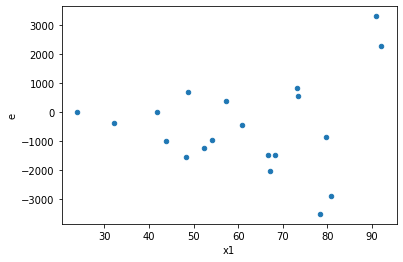

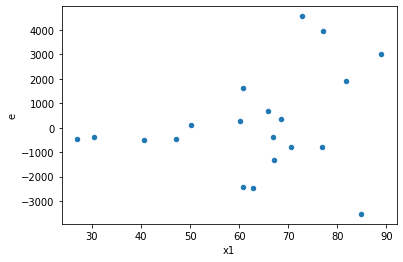

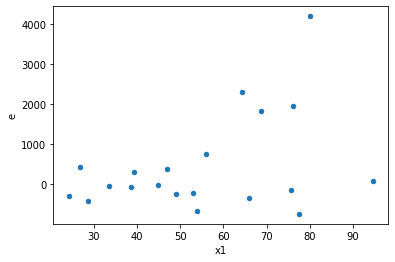

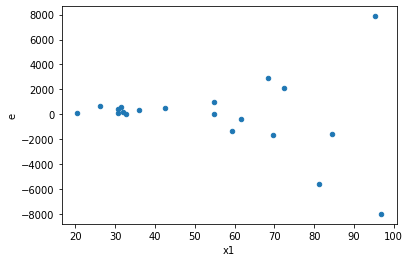

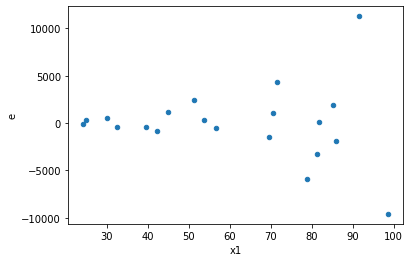

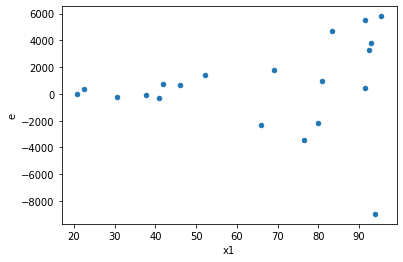

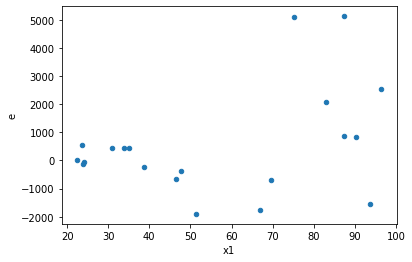

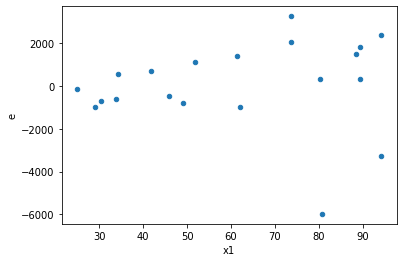

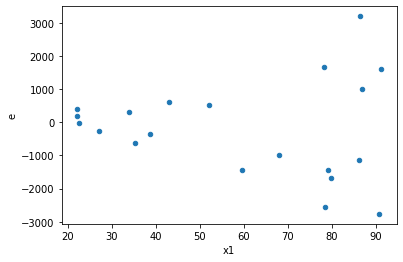

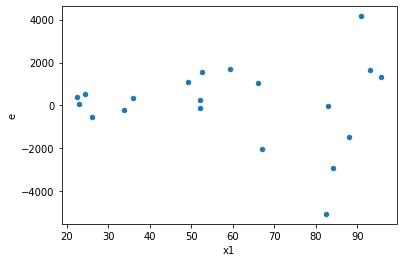

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,4341440.4084281875,12317847.27954751,620205.7726325982,1759692.4685067872,2.837271992870028,0.19225627441848503,0.9038718627907575,0.09612813720924251,Reject005=1 : Homoscedasticity
2.0,7.0,7.0,2431446.200871485,37340885.10429409,347349.457267355,5334412.157756299,15.35747946671009,0.0018635762950949264,0.9990682118524525,0.0009317881475474632,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,6870764.058947465,54052440.37167597,981537.7227067808,7721777.19595371,7.867020306320383,0.014277024570389152,0.9928614877148054,0.007138512285194576,Reject005=0 : Heteroscedasticity
7.0,7.0,7.0,6558686.688794124,98208892.33514312,936955.2412563034,14029841.762163302,14.973865500076165,0.0020189351959318813,0.9989905324020341,0.0010094675979659407,Reject005=0 : Heteroscedasticity
8.0,7.0,7.0,4428117.85240212,45111647.41652793,632588.2646288743,6444521.059503989,10.187544442173376,0.006646187688536864,0.9966769061557316,0.003323093844268432,Reject005=0 : Heteroscedasticity
9.0,7.0,7.0,2659068.3097314844,15739232.919915719,379866.90139021206,2248461.8457022454,5.9190780704332795,0.03178224317692879,0.9841088784115356,0.015891121588464396,Reject005=0 : Heteroscedasticity
10.0,7.0,7.0,3391582.1904816558,29056891.237829767,484511.7414973794,4150984.4625471095,8.567355766691076,0.011133782057302088,0.994433108971349,0.005566891028651044,Reject005=0 : Heteroscedasticity
11.0,7.0,7.0,8718823.538255826,53601909.66873249,1245546.2197508323,7657415.666961784,6.147837427095741,0.028647434996258214,0.9856762825018709,0.014323717498129107,Reject005=0 : Heteroscedasticity
12.0,7.0,7.0,575699.4856386917,19983802.019487385,82242.78366267025,2854828.859926769,34.712211002441634,0.00012953789521974457,0.9999352310523901,6.476894760987228e-05,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,39286215.62217895,6995709.459084905,5612316.517454135,999387.0655835578,0.17807033200559771,0.03665005059073581,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,4341440.4084281875,12317847.27954751,620205.7726325982,1759692.4685067872,2.837271992870028,0.19225627441848503,Reject005=1 : Homoscedasticity
2.0,7.0,7.0,2431446.200871485,37340885.10429409,347349.457267355,5334412.157756299,15.35747946671009,0.0018635762950949264,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,6870764.058947465,54052440.37167597,981537.7227067808,7721777.19595371,7.867020306320383,0.014277024570389152,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,118238683.6596239,2064607.466878689,16891240.522803415,294943.9238398127,0.017461353619447558,2.385172258632028e-05,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,75986527.1548136,3126889.629316681,10855218.164973373,446698.51847381156,0.041150579535580184,0.00042296329079650834,Reject005=0 : Heteroscedasticity
6.0,7.0,7.0,7301314.221224629,1424533.9226694377,1043044.8887463756,203504.84609563395,0.19510650815826752,0.046734161146984955,Reject005=0 : Heteroscedasticity
7.0,7.0,7.0,6558686.688794124,98208892.33514312,936955.2412563034,14029841.762163302,14.973865500076165,0.0020189351959318813,Reject005=0 : Heteroscedasticity
8.0,7.0,7.0,4428117.85240212,45111647.41652793,632588.2646288743,6444521.059503989,10.187544442173376,0.006646187688536864,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    859
Reject005=1 : Homoscedasticity      141
Name: Result_test, dtype: int64